In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
pd.options.mode.chained_assignment = None
plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')

In [128]:
plt.style.use('dark_background')

In [129]:
#ESS Round 8: European Social Survey Round 8 Data (2016). Data file edition 2.1. NSD - Norwegian Centre for Research Data, Norway – Data Archive and distributor of ESS data for ESS ERIC. doi:10.21338/NSD-ESS8-2016.
#Source Questionnaires at https://www.europeansocialsurvey.org/docs/round8/fieldwork/source/ESS8_source_questionnaires.pdf
req = Request('http://ivanachille.com/publicdata/european-social-survey/ESS8e02.1_F1.csv')
req2 = Request('http://ivanachille.com/publicdata/european-social-survey/variables.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
req2.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)
content2 = urlopen(req2)

df = pd.read_csv(content)
vars = pd.read_csv(content2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
df

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,...,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde,inwdds,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight
0,ESS8e02_1,8,2.1,01.12.2018,1,AT,120,4,180,8,8,3,1,2,2,2,3,6,7,0,2,8,9,10,3,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11070,555555,2,6,1,2,2,3,5,1,2,4,3,1,2,6,3,6,1,1,1,6,3,AT13,2,NaN,5,12,2016,7,37,5,12,2016,8,33,50.0,0.611677,1.178496,0.370393
1,ESS8e02_1,8,2.1,01.12.2018,2,AT,120,5,120,6,6,5,1,1,3,2,3,5,4,3,3,4,6,7,3,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11070,555555,3,6,2,3,5,3,5,3,4,3,2,3,3,4,5,5,2,2,2,5,5,AT13,2,NaN,25,11,2016,9,39,25,11,2016,11,10,86.0,1.223354,0.899472,0.370393
2,ESS8e02_1,8,2.1,01.12.2018,4,AT,30,2,6666,5,6,4,3,2,2,2,2,3,5,9,3,3,4,5,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11010,555555,3,5,2,4,1,6,5,2,3,2,2,3,6,1,6,3,3,1,2,2,3,AT31,2,NaN,22,11,2016,17,17,22,11,2016,18,0,38.0,0.389058,0.315753,0.370393
3,ESS8e02_1,8,2.1,01.12.2018,6,AT,30,5,120,6,5,6,2,3,2,3,4,1,1,2,1,1,1,1,7,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11010,555555,2,3,2,2,2,3,3,2,2,2,2,3,3,2,3,4,2,2,3,2,2,AT13,2,NaN,11,10,2016,19,9,11,10,2016,19,59,46.0,0.642594,0.472467,0.370393
4,ESS8e02_1,8,2.1,01.12.2018,10,AT,30,5,180,5,5,7,3,3,3,4,1,7,7,10,6,7,9,10,2,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23000,555555,3,4,1,4,3,3,5,3,1,1,1,1,3,4,5,2,3,1,1,4,1,AT22,2,NaN,1,12,2016,10,31,1,12,2016,11,49,70.0,3.432402,2.246706,0.370393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,ESS8e02_1,8,2.1,01.12.2018,1303,SI,90,2,6666,1,2,1,2,1,4,1,4,0,0,3,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14120,555555,1,2,3,2,1,1,5,4,2,1,1,1,1,1,1,2,2,1,2,1,1,SI016,3,NaN,19,10,2016,7,30,19,10,2016,8,37,62.0,1.000000,0.835442,0.134491
44383,ESS8e02_1,8,2.1,01.12.2018,1304,SI,40,5,120,3,5,2,2,2,2,1,2,0,0,2,0,1,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14030,555555,1,4,2,2,2,3,2,2,3,3,1,1,1,1,4,1,2,1,1,1,2,SI011,3,NaN,30,9,2016,8,38,30,9,2016,9,45,60.0,1.000000,0.756328,0.134491
44384,ESS8e02_1,8,2.1,01.12.2018,1305,SI,240,5,150,3,3,4,2,2,2,1,2,3,5,9,1,1,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14120,555555,2,6,1,1,1,2,1,2,1,4,1,2,2,2,4,1,1,2,1,2,5,SI011,3,NaN,26,9,2016,9,9,26,9,2016,10,17,62.0,1.000000,0.856172,0.134491
44385,ESS8e02_1,8,2.1,01.12.2018,1306,SI,0,5,120,5,5,5,3,2,5,2,5,1,6,5,1,1,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14120,555555,2,3,2,2,2,1,5,2,2,1,1,1,1,1,2,3,1,3,2,4,1,SI011,3,NaN,2,11,2016,17,0,2,11,2016,18,25,78.0,1.000000,0.756328,0.134491


In [131]:
#ESS8_source_questionnaires https://www.europeansocialsurvey.org/docs/round8/fieldwork/source/ESS8_source_questionnaires.pdf
vars

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
0,cntry,Country,no,nominal,discrete,character-2,44387,0,5 Country,Group Country
1,dweight,Design weight,no,continuous,continuous,numeric-4.2,44387,0,R17 Design weight,Group Weights
2,pspwght,Post-stratification weight including design weight,no,continuous,continuous,numeric-4.2,44387,0,R18 Post-stratification weight including design weight,Group Weights
3,pweight,Population size weight (must be combined with dweight or pspwght),no,continuous,continuous,numeric-8.2,44387,0,R19 Population size weight (must be combined with dweight or pspwght),Group Weights
4,nwspol,"News about politics and current affairs, watching, reading or listening, in minutes",no,continuous,continuous,numeric-4.0,43863,524,"A1 On a typical day, about how much time do you spend watching, reading or listening to news about politics and current affairs?",Group Media and social trust
...,...,...,...,...,...,...,...,...,...,...
529,inwmme,"End of interview, month",no,continuous,continuous,numeric-2.0,44378,9,"R8 End of interview, month",Group Administrative variables
530,inwyye,"End of interview, year",no,continuous,continuous,numeric-4.0,44378,9,"R9 End of interview, year",Group Administrative variables
531,inwehh,"End of interview, hour",no,continuous,continuous,numeric-2.0,43976,411,"R10 End of interview, hour",Group Administrative variables
532,inwemm,"End of interview, minute",no,continuous,continuous,numeric-2.0,43977,410,"R11 End of interview, minute",Group Administrative variables


In [132]:
df.isna().sum().sum()

8786829

In [133]:
vars.isna().sum()

Name                0
Label               0
Country_specific    0
Scale_type          0
Type                0
Format              0
Valid               0
Invalid             0
Question            0
Group               0
dtype: int64

In [134]:
vars['Group'].unique()

array(['Group Country', 'Group Weights', 'Group Media and social trust',
       'Group Politics',
       'Group Subjective well-being, social exclusion, religion, national and ethnic identity',
       'Group Climate change', 'Group Welfare attitudes',
       'Group Gender, Year of birth and Household grid',
       'Group Socio-demographics', 'Group Human values',
       'Group Administrative variables'], dtype=object)

In [135]:
vars[vars['Group']=='Group Weights']['Label'].unique()

array(['Design weight',
       'Post-stratification weight including design weight',
       'Population size weight (must be combined with dweight or pspwght)'],
      dtype=object)

In [136]:
vars['Scale_type'].unique()

array(['nominal', 'continuous', 'ordinal', 'binary'], dtype=object)

In [137]:
df['polintr'].unique()

array([1, 3, 2, 4, 8, 7, 9])

In [138]:
vars[vars['Name']=='polintr']

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
10,polintr,How interested in politics,no,ordinal,discrete,numeric-1.0,44290,97,B1 How interested would you say you are in politics - are you...,Group Politics


In [139]:
df['polintr'].loc[(df['polintr']==9) | (df['polintr']==8) | (df['polintr']==7)].count()

97

<u>How are invalid entries calculated</u><br>
For example, invalid answers on <b>polintr</b> (97) contemplate all answers that either answer 'Refuse', 'Don't Know' or answer with an non-listed answer, in this case, the number '9'.

<br>

# Initial selection of possibly relevant variables for analysis

In [140]:
politics_vars = ['How interested in politics','Political system allows people to have a say in what government does','Able to take active role in political group',
                                     'Political system allows people to have influence on politics','Confident in own ability to participate in politics',
                                     "Trust in country's parliament","Trust in the legal system","Trust in the police","Trust in politicians","Trust in political parties",
                                     "Trust in the United Nations","Voted last national election","Contacted politician or government official last 12 months",
                                     "Worked in political party or action group last 12 months","Worn or displayed campaign badge/sticker last 12 months",
                                     "Signed petition last 12 months","Taken part in lawful public demonstration last 12 months","Posted or shared anything about politics online last 12 months",
                                     "Feel closer to a particular party than all other parties","Placement on left right scale","How satisfied with life as a whole",
                                     "How satisfied with present state of economy in country","How satisfied with the national government","How satisfied with the way democracy works in country",
                                     "State of education in country nowadays","State of health services in country nowadays","Government should reduce differences in income levels",
                                     'Men should have more right to job than women when jobs are scarce', 'Gays and lesbians free to live life as they wish', 'Ashamed if close family member gay or lesbian',
                                     'Gay and lesbian couples right to adopt children', 'Allow many/few immigrants of same race/ethnic group as majority', 'Allow many/few immigrants of different race/ethnic group from majority',
                                     'Allow many/few immigrants from poorer countries outside Europe',"Immigration bad or good for country's economy","Country's cultural life undermined or enriched by immigrants",
                                     'Immigrants make country worse or better place to live']

In [141]:
misc_vars = ['How happy are you',
       'How often socially meet with friends, relatives or colleagues',
       'How many people with whom you can discuss intimate and personal matters',
       'Take part in social activities compared to others of same age',
       'Respondent or household member victim of burglary/ assault last 5 years',
       'Feeling of safety of walking alone in local area after dark',
       'Subjective general health',
       'Hampered in daily activities by illness/disability/infirmity/ mental problem',
       'Belonging to particular religion or denomination',
       'How religious are you',
       'How often attend religious services apart from special occasions',
       'How often pray apart from at religious services',
       'Member of a group discriminated against in this country',
       "Discrimination of respondent's group: colour or race",
       "Discrimination of respondent's group: nationality",
       "Discrimination of respondent's group: religion",
       "Discrimination of respondent's group: language",
       "Discrimination of respondent's group: ethnic group",
       "Discrimination of respondent's group: age",
       "Discrimination of respondent's group: gender",
       "Discrimination of respondent's group: sexuality",
       "Discrimination of respondent's group: disability",
       "Discrimination of respondent's group: other grounds",
       "Discrimination of respondent's group: don't know",
       "Discrimination of respondent's group: refusal",
       "Discrimination of respondent's group: not applicable",
       "Discrimination of respondent's group: no answer",
       'Citizen of country', 'Citizenship', 'Born in country',
       'Country of birth', 'What year you first came to live in country',
       'Language most often spoken at home: first mentioned',
       'Language most often spoken at home: second mentioned',
       'Belong to minority ethnic group in country',
       'Government should be generous judging\napplications for refugee status',
       'Most refugee applicants not in real fear of persecution own countries',
       'Granted refugees should be entitled to bring close family members']

In [142]:
sociodemographic_vars = ['Ever lived with a partner, without being married',
       'Ever been divorced/had civil union dissolved','Legal marital status',
       'Years of full-time education completed',
       'Doing last 7 days: paid work', 'Doing last 7 days: education',
       'Doing last 7 days: unemployed, actively looking for job',
       'Doing last 7 days: unemployed, not actively looking for job',
       'Doing last 7 days: permanently sick or disabled',
       'Doing last 7 days: retired',
       'Doing last 7 days: community or military service',
       'Doing last 7 days: housework, looking after children, others',
       'Doing last 7 days: other', 'Doing last 7 days: refusal',
       "Doing last 7 days: don't know", 'Doing last 7 days: no answer',
       'Interviewer code, one/more than one doing last 7 days',
       'Main activity last 7 days',
       'Main activity, last 7 days. All respondents. Post coded',
       'Interviewer code, respondent in paid work',
       'Control paid work last 7 days', 'Ever had a paid job',
       'Year last in paid job', 'Employment relation',
       'Number of employees respondent has/had',
       'Employment contract unlimited or limited duration',
       'Establishment size',
       'Responsible for supervising other employees',
       'Number of people responsible for in job',
       'Allowed to decide how daily work is organised',
       'Allowed to influence policy decisions about activities of organisation',
       'Total contracted hours per week in main job overtime excluded',
       "Have a set 'basic' or contracted number of hours",
       'Total hours normally  worked per week in main job overtime included',
       'Industry, NACE rev.2',
       'What type of organisation work/worked for', 'Occupation, ISCO08',
       'Paid work in another country, period more than 6 months last 10 years',
       'Ever unemployed and seeking work for a period more than three months',
       'Any period of unemployment and work seeking lasted 12 months or more',
       'Any period of unemployment and work seeking within last 5 years',
       'Member of trade union or similar organisation',
       'Main source of household income',
       "Household's total net income, all sources",
       "Feeling about household's income nowadays",'Highest level of education']

In [143]:
demog_vars = ['Number of people living regularly as member of household',
       'Gender', 'Gender of second person in household', 'Age of respondent, calculated']

Full use of 'Group Media and social trust', 'Group Human values', 'Group Climate change', 'Group Welfare attitudes'.

In [144]:
otherfull_vars = vars.loc[
               (vars['Group']=='Group Country') |
              (vars['Group']=='Group Weights') |
              (vars['Group']=='Group Media and social trust') | 
              (vars['Group']=='Group Human values') | 
              (vars['Group']=='Group Climate change') | 
              (vars['Group']=='Group Welfare attitudes')]['Label'].tolist()

In [145]:
total_vars = otherfull_vars+politics_vars+misc_vars+sociodemographic_vars+demog_vars

In [146]:
final_variables_to_use = vars.iloc[np.array([vars[vars['Label']==total_vars[i]].index[0] for i in range(len(total_vars))]).flatten()]['Name'].tolist()
final_variables_to_use = np.array(final_variables_to_use).flatten()

In [147]:
len(final_variables_to_use)

230

###<br>

# General data cleaning

In [148]:
data = df[final_variables_to_use]

In [149]:
data

,cntry,dweight,pspwght,pweight,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt1,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,...,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlb,hhmmb,gndr,gndr2,agea
0,AT,0.611677,1.178496,0.370393,120,4,180,8,8,3,8,4,10,5,5,1,5,1,1,1,2,3,4,4,2,2,2,3,1,6,6,4,8,4,10,10,0,0,0,1,...,0,0,0,0,0,0,2,66,2,2,2,1,2015,1,66666,2,1,2,66666,5,0,25,1,40,72,2,2310,2,1,2,1,3,6,77,2,720,1,2,6,34
1,AT,1.223354,0.899472,0.370393,120,5,120,6,6,5,10,5,3,5,2,2,5,2,5,5,1,2,2,3,1,1,2,2,1,6,6,4,7,4,2,8,3,4,6,1,...,0,0,0,0,0,0,2,66,1,1,6,6,6666,2,0,6,1,2,66666,10,3,666,2,50,74,5,2641,2,1,2,2,3,1,5,2,313,2,1,2,52
2,AT,0.389058,0.315753,0.370393,30,2,6666,5,6,4,9,4,3,5,4,2,5,1,1,4,3,4,3,3,3,2,3,3,1,6,6,4,8,4,2,6,1,3,1,4,...,0,0,0,0,0,0,2,66,6,2,2,1,2003,1,66666,2,1,2,66666,0,0,38,1,38,96,1,5230,2,1,2,2,2,4,2,2,322,1,2,6,68
3,AT,0.642594,0.472467,0.370393,30,5,120,6,5,6,10,4,7,3,3,3,4,2,3,4,2,2,2,2,3,3,3,3,2,6,6,3,6,3,7,5,6,5,6,3,...,0,0,0,0,0,0,2,66,1,1,6,6,6666,1,66666,1,4,2,66666,7,8,40,1,40,999,4,9629,2,2,6,6,2,1,4,2,322,1,1,6,54
4,AT,3.432402,2.246706,0.370393,30,5,180,5,5,7,10,6,10,5,2,3,3,1,1,3,1,1,1,3,1,1,4,5,1,6,6,4,6,4,5,10,10,2,7,3,...,0,1,0,0,0,0,1,3,3,2,2,1,2016,1,66666,1,1,2,66666,0,0,40,1,40,81,4,4110,2,2,6,6,3,1,2,2,322,5,2,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,SI,1.000000,0.835442,0.134491,90,2,6666,1,2,1,10,5,10,5,4,5,4,1,1,2,3,5,3,3,3,3,3,3,1,6,6,3,5,3,5,5,5,3,1,3,...,0,0,0,0,0,0,2,66,6,2,2,1,2007,1,66666,1,3,2,66666,5,0,40,1,40,71,4,3322,2,2,6,6,2,4,4,2,323,2,2,1,65
44383,SI,1.000000,0.756328,0.134491,40,5,120,3,5,2,5,3,3,2,3,3,5,2,2,1,2,3,4,2,3,2,2,2,1,6,6,3,4,3,5,3,1,3,3,2,...,0,1,0,0,0,0,1,1,1,1,6,6,6666,3,66666,1,1,1,2,8,7,40,1,40,25,4,2631,2,2,6,6,3,2,77,1,620,4,2,1,40
44384,SI,1.000000,0.856172,0.134491,240,5,150,3,3,4,10,6,10,4,1,1,4,2,2,4,1,4,4,5,2,2,2,3,1,6,6,3,7,4,1,8,6,2,4,1,...,0,0,0,0,0,0,2,66,6,2,2,1,2007,3,66666,1,1,1,3,10,10,40,1,60,62,5,1120,2,1,2,2,2,1,7,1,620,3,1,2,63
44385,SI,1.000000,0.756328,0.134491,0,5,120,5,5,5,8,4,4,5,3,4,4,1,1,3,2,3,2,3,3,2,2,2,1,6,6,4,7,3,4,6,4,3,2,2,...,0,0,0,0,0,0,2,66,1,1,6,6,6666,1,66666,1,4,1,11,10,2,40,1,45,64,6,5222,2,2,6,6,2,1,10,1,720,4,2,1,45


In [150]:
data.columns[data.isnull().any()]

Index(['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
       'rfgfrpc'],
      dtype='object')

In [151]:
data[['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb', 'rfgfrpc']].isna().sum()

eusclbf     8937 
eudcnbf     8937 
lknemny     2010 
vteurmmb    12915
vteumbgb    42428
vteubcmb    35450
rfgfrpc     1614 
dtype: int64

In [152]:
data[['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
        'rfgfrpc']].isna().sum()/len(data[['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
        'rfgfrpc']])*100

eusclbf     20.134274
eudcnbf     20.134274
lknemny     4.528353 
vteurmmb    29.096357
vteumbgb    95.586546
vteubcmb    79.865726
rfgfrpc     3.636200 
dtype: float64

In [153]:
sfss = ['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
        'rfgfrpc']
vars.iloc[[vars[vars['Name']==sfss[i]].index[0] for i in range(len(sfss))]]

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
243,eusclbf,Against or In favour of European Union-wide social benefit scheme,no,ordinal,discrete,numeric-1.0,32587,11800,eusclbf?,Group Welfare attitudes
244,eudcnbf,More decisions made by EU: level of benefits in [country] become higher or lower,no,ordinal,discrete,numeric-1.0,31764,12623,"E38 If more decisions were made by the European Union rather than by national governments, do you think the level of social benefits and services provided\nin [country] would become higher or lower?",Group Welfare attitudes
246,lknemny,How likely not enough money for household necessities next 12 months,no,ordinal,discrete,numeric-1.0,40612,3775,E40 And during the next 12 months how likely is it that there will be some periods when you don't have\nenough money to cover your household necessities?,Group Welfare attitudes
247,vteurmmb,Would vote for [country] to remain member of European Union or leave,no,binary,discrete,numeric-2.0,29568,14819,E41 Imagine there were a referendum in [country] tomorrow about membership of the European Union. Would you\nvote for [country] to remain a member of the European Union or to leave the European Union?,Group Welfare attitudes
248,vteumbgb,"Would vote for [country] to remain member of European Union or leave, United Kingdom",no,binary,discrete,numeric-2.0,1863,42524,"E41GB If there were to be a new referendum tomorrow, would you vote for the UK to remain a member of the European Union or leave the European Union? (United Kingdom)",Group Welfare attitudes
249,vteubcmb,Would vote for [country] to become member of European Union or remain outside,no,binary,discrete,numeric-2.0,7787,36600,E42 Imagine there were a referendum in [country] tomorrow about membership of the European Union. Would you vote for [country] to become a member of the European Union or to remain outside the European Union?,Group Welfare attitudes
174,rfgfrpc,Most refugee applicants not in real fear of persecution own countries,no,ordinal,discrete,numeric-1.0,39191,5196,rfgfrpc?,"Group Subjective well-being, social exclusion, religion, national and ethnic identity"


As most variables that have null values are related to supra EU politics, which are not really that relevant for the desired analysis of this project, I will proceed to drop them.

In [154]:
data = data.drop(['eusclbf', 'eudcnbf', 'vteurmmb', 'vteumbgb', 'vteubcmb',
       ], axis=1)

Let's see how <b>lknemny</b> and <b>rfgfrpc</b> values can be filled. Both are discrete, scale-type ranges with 7 and 8 as non-valid answers, it would be a smart choice to replace with the rounded mean, only taking into calculation the valid entries.

In [155]:
temp1 = data.drop(data.loc[(data['lknemny']==7) | (data['lknemny']==8) | (data['lknemny']==9)]['lknemny'].index)['lknemny']

In [156]:
mt1 = round(np.mean(temp1))

In [157]:
mt1

2

In [158]:
data['lknemny'] = data['lknemny'].fillna(mt1)

In [159]:
data['lknemny'].unique()

array([2., 1., 3., 4., 8., 7., 9.])

In [160]:
temp2 = data.drop(data.loc[(data['rfgfrpc']==7) | (data['rfgfrpc']==8) | (data['rfgfrpc']==9)]['rfgfrpc'].index)['rfgfrpc']

In [161]:
mt2 = round(np.mean(temp2))

In [162]:
mt2

3

In [163]:
data['rfgfrpc'].unique()

array([ 5.,  4.,  2.,  3.,  1.,  8.,  7.,  9., nan])

In [164]:
data['rfgfrpc'] = data['rfgfrpc'].fillna(mt2)

In [165]:
data['rfgfrpc'].unique()

array([5., 4., 2., 3., 1., 8., 7., 9.])

In [166]:
data.columns[data.isnull().any()]

Index([], dtype='object')

Now, all non-valid values should be deleted for the purpose of direct analysis. There are different types of structures that inherently change the non-valid answers across different variables, hopefully the <b>Format</b> feature includes the different types of variations and can help to create a function that models and deletes all the non-valid information according to its own kind of information format.

In [167]:
vars['Format'].unique()

array(['character-2', 'numeric-4.2', 'numeric-8.2', 'numeric-4.0',
       'numeric-1.0', 'numeric-2.0', 'character-3', 'numeric-5.0',
       'numeric-3.0', 'numeric-6.0', 'character-5', 'character-12',
       'character-10', 'numeric-12.0'], dtype=object)

In [168]:
vars.iloc[[vars[vars['Name']==final_variables_to_use[i]].index[0] for i in range(len(final_variables_to_use))]]['Format'].unique()

array(['character-2', 'numeric-4.2', 'numeric-8.2', 'numeric-4.0',
       'numeric-1.0', 'numeric-2.0', 'character-3', 'numeric-5.0',
       'numeric-3.0'], dtype=object)

This shows that there are 5 types of numeric data structures, I will create a cleaning pipeline that adapts to the structure of the data in order to drop the invalid values

In [169]:
def su(var):
  return sorted(var.unique())

In [170]:
def sufl(var):
  return np.array(sorted(var.unique())).flatten()

In [171]:
def indexInvalid(var):
  su = sorted(var.unique())

  #multiple-condition structure-specific cleaning ps-pipeline

  if any(x in su for x in (66,77,88,99))==True and su[-1]<100:
    #works for overall numeric 2-0
    tmp = var.loc[(var==66) | (var==77) | (var==88) | (var==99)]
    tmp_index = tmp.index
    return len(tmp_index)

  elif su[-1]==9 and su[-2]==8 and su[-3]==7 and su[-4]==6:

    conditionalspecificstring = vars.loc[vars['Name']==var.name]['Question'].any()
    conditionalspecificstring2 = vars.loc[vars['Name']==var.name]['Label'].any()

    if conditionalspecificstring.startswith("Ha-u"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return len(tmp_index)
    elif conditionalspecificstring2.startswith("Important"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return len(tmp_index)
    else:
      tmp = var.loc[(var==9) | (var==7) | (var==8) | (var==6)]
      tmp_index = tmp.index
      return len(tmp_index)

  elif su[-1]==9 and su[-2]==8 and su[-3]==7:
    tmp = var.loc[(var==9) | (var==7) | (var==8)]
    tmp_index = tmp.index
    return len(tmp_index)

  elif su[-1]==8 and su[-2]==7:
    tmp = var.loc[(var==7) | (var==8)]
    tmp_index = tmp.index
    return len(tmp_index)
  

  

  

In [172]:
constr_vars = vars.iloc[[vars.loc[vars['Name']==final_variables_to_use[i]].index[0] for i in range(len(final_variables_to_use))]]

In [173]:
ccl = []
cnt = 0
for i in range(len(constr_vars)):

  invalids_true = constr_vars.iloc[i]['Invalid']

  var_name = constr_vars.iloc[i]['Name']

  try:
    invalids_predicted = indexInvalid(data[var_name])
  except:
    continue

  if invalids_true==invalids_predicted:
    ccl.append(i)
    cnt = cnt+1

In [174]:
cnt

169

In [175]:
ccl = np.array(ccl).flatten().astype(int)

In [176]:
tmp_notcleaned = constr_vars.drop(constr_vars.index[ccl])

In [177]:
tmp_notcleaned.loc[tmp_notcleaned['Invalid']!=0].shape

(31, 10)

There is enough relevant data to proceed with the analysis. I'll drop the remaining non-possible-to-clean variables.

In [178]:
def GatherInvalidIndices(var):
  su = sorted(var.unique())

  #multiple-condition structure-specific cleaning ps-pipeline

  if any(x in su for x in (66,77,88,99))==True and su[-1]<100:
    #works for overall numeric 2-0
    tmp = var.loc[(var==66) | (var==77) | (var==88) | (var==99)]
    tmp_index = tmp.index
    return tmp_index

  elif su[-1]==9 and su[-2]==8 and su[-3]==7 and su[-4]==6:

    conditionalspecificstring = vars.loc[vars['Name']==var.name]['Question'].any()
    conditionalspecificstring2 = vars.loc[vars['Name']==var.name]['Label'].any()

    if conditionalspecificstring.startswith("Ha-u"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return tmp_index
    elif conditionalspecificstring2.startswith("Important"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return tmp_index
    else:
      tmp = var.loc[(var==9) | (var==7) | (var==8) | (var==6)]
      tmp_index = tmp.index
      return tmp_index

  elif su[-1]==9 and su[-2]==8 and su[-3]==7:
    tmp = var.loc[(var==9) | (var==7) | (var==8)]
    tmp_index = tmp.index
    return tmp_index

  elif su[-1]==8 and su[-2]==7:
    tmp = var.loc[(var==7) | (var==8)]
    tmp_index = tmp.index
    return tmp_index

In [179]:
#Cleaning Pipeline Procedure
for i in range(len(final_variables_to_use)):
  try:
    ind = GatherInvalidIndices(data[final_variables_to_use[i]])
    tmp = data.drop(data[final_variables_to_use[i]].index[ind])[final_variables_to_use[i]]
    fillwith = round(np.mean(tmp))
    data.iloc[ind,data.columns.get_loc(final_variables_to_use[i])] = fillwith
    print(f'filled {final_variables_to_use[i]} non-valids with {fillwith} in {len(ind)} rows')

    rowindex = vars.loc[vars['Name']==final_variables_to_use[i]].index
    vars.iloc[rowindex,vars.columns.get_loc('Invalid')] = 0
    print(f'replacing {final_variables_to_use[i]} Invalid column value to 0')
  except:
    continue

filled netusoft non-valids with 4 in 49 rows
replacing netusoft Invalid column value to 0
filled ppltrst non-valids with 5 in 115 rows
replacing ppltrst Invalid column value to 0
filled pplfair non-valids with 6 in 315 rows
replacing pplfair Invalid column value to 0
filled pplhlp non-valids with 5 in 176 rows
replacing pplhlp Invalid column value to 0
filled eneffap non-valids with 8 in 1111 rows
replacing eneffap Invalid column value to 0
filled rdcenr non-valids with 4 in 318 rows
replacing rdcenr Invalid column value to 0
filled cflsenr non-valids with 6 in 952 rows
replacing cflsenr Invalid column value to 0
filled elgcoal non-valids with 4 in 3295 rows
replacing elgcoal Invalid column value to 0
filled elgngas non-valids with 4 in 3029 rows
replacing elgngas Invalid column value to 0
filled elghydr non-valids with 2 in 2240 rows
replacing elghydr Invalid column value to 0
filled elgnuc non-valids with 4 in 2923 rows
replacing elgnuc Invalid column value to 0
filled elgsun non-val

In [180]:
a = vars.iloc[[vars.loc[vars['Name']==data.columns[i]].index[0] for i in range(len(data.columns))]]

In [181]:
ultimate_vars = a

The remaining variables with invalid entries that escape the cleaning pipeline shall be transformed manually when required in the analysis

###<br>

#Exploratory Data Analysis

In [182]:
data.head(1)

,cntry,dweight,pspwght,pweight,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt1,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,...,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlb,hhmmb,gndr,gndr2,agea
0,AT,0.611677,1.178496,0.370393,120,4,180,8,8,3,8,4,10,5,5,1,5,1,1,1,2,3,4,4,2,2,2,3,1,6,6,4,8,4,10,10,0,0,0,1,...,0,0,0,0,0,0,2,3,2,2,2,1,2015,1,66666,2,1,2,66666,5,0,25,1,40,72,2,2310,2,1,2,1,3,6,5,2,720,1,2,6,34


The **anweight** (pspwght * pweight) indicates the weight that should be used when analysing the different countries between them, it takes in consideration their intrinsic features such as population. Nonetheless, I won't be directly applying it as I'm looking to model the global gross data rather than bivariate country analysis.



In [183]:
#temporary functions
def spl(v):
  return psvp_labels[psvp.index(v)]

def SortedR2(var):
  corrs = []
  for i in range(len(psvp)):
    cm = np.corrcoef(data[var],data[psvp[i]])**2
    nm = psvp[i]
    corrs.append([cm[0][1],nm])
  a = sorted(corrs)
  return a[::-1][:10]

def plot_init():
  return plt.figure(figsize=(14,8))

def rev(data, high):
  #high: highest rank within scale
  #reverses scores of ranking-type data, convenient for data visualisation.
    data = high - data
    return data

###<u>Political Apprehension and Social Contentment</u>

In [184]:
ultimate_vars[ultimate_vars['Group']=='Group Politics']

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
10,polintr,How interested in politics,no,ordinal,discrete,numeric-1.0,44290,0,B1 How interested would you say you are in politics - are you...,Group Politics
11,psppsgva,Political system allows people to have a say in what government does,no,ordinal,discrete,numeric-1.0,43429,0,B2 How much would you say the political system in [country] allows people like you to have a say in what the government does?,Group Politics
12,actrolga,Able to take active role in political group,no,ordinal,discrete,numeric-1.0,43452,0,B3 How able do you think you are to take an active role in a group involved with political issues?,Group Politics
13,psppipla,Political system allows people to have influence on politics,no,ordinal,discrete,numeric-1.0,43545,0,B4 And how much would you say that the political system in [country] allows people like you to have an influence on politics?,Group Politics
14,cptppola,Confident in own ability to participate in politics,no,ordinal,discrete,numeric-1.0,43389,0,B5 And how confident are you in your own ability to participate in politics?,Group Politics
15,trstprl,Trust in country's parliament,no,ordinal,discrete,numeric-2.0,43514,0,"B6-12 Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust an\ninstitution at all, and 10 means you have complete trust. Firstly... ...[country]'s parliament?",Group Politics
16,trstlgl,Trust in the legal system,no,ordinal,discrete,numeric-2.0,43538,0,"B6-12 Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust\nan institution at all, and 10 means you have complete trust. Firstly... ...the legal system?",Group Politics
17,trstplc,Trust in the police,no,ordinal,discrete,numeric-2.0,44067,0,"B6-12 Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust an\ninstitution at all, and 10 means you have complete trust. Firstly... ...the police?",Group Politics
18,trstplt,Trust in politicians,no,ordinal,discrete,numeric-2.0,43741,0,"B6-12 Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust an\ninstitution at all, and 10 means you have complete trust. Firstly... ...politicians?",Group Politics
19,trstprt,Trust in political parties,no,ordinal,discrete,numeric-2.0,43532,0,"B6-12 Using this card, please tell me on a score of 0-10 how much you personally trust each of the institutions I read out. 0 means you do not trust\nan institution at all, and 10 means you have complete trust. Firstly... ...political parties?",Group Politics


In [185]:
def SearchVar(name):
  return ultimate_vars[ultimate_vars['Name']==name]

Let's start by analysing the gross reported political interest and how does it affect other political variables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


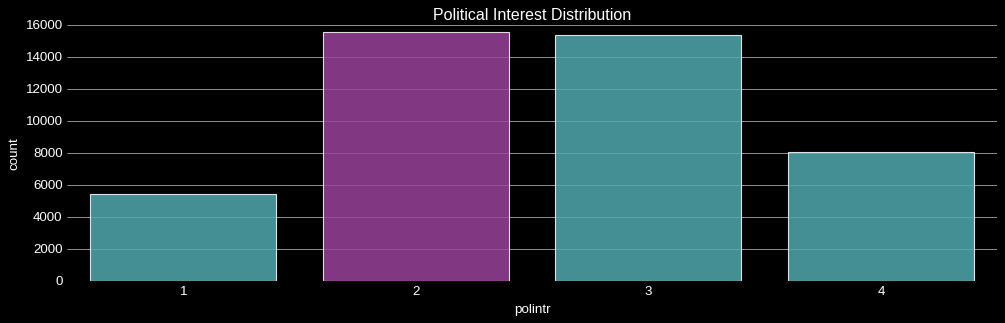

In [186]:
plt.figure(figsize=(15,4))
plt.title('Political Interest Distribution')
sns.countplot(data['polintr'], dodge=False, palette=['#42b7bd','#a834a8','#42b7bd','#42b7bd'], alpha=.85)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

Text(0, 0.5, 'Trust in the UN')

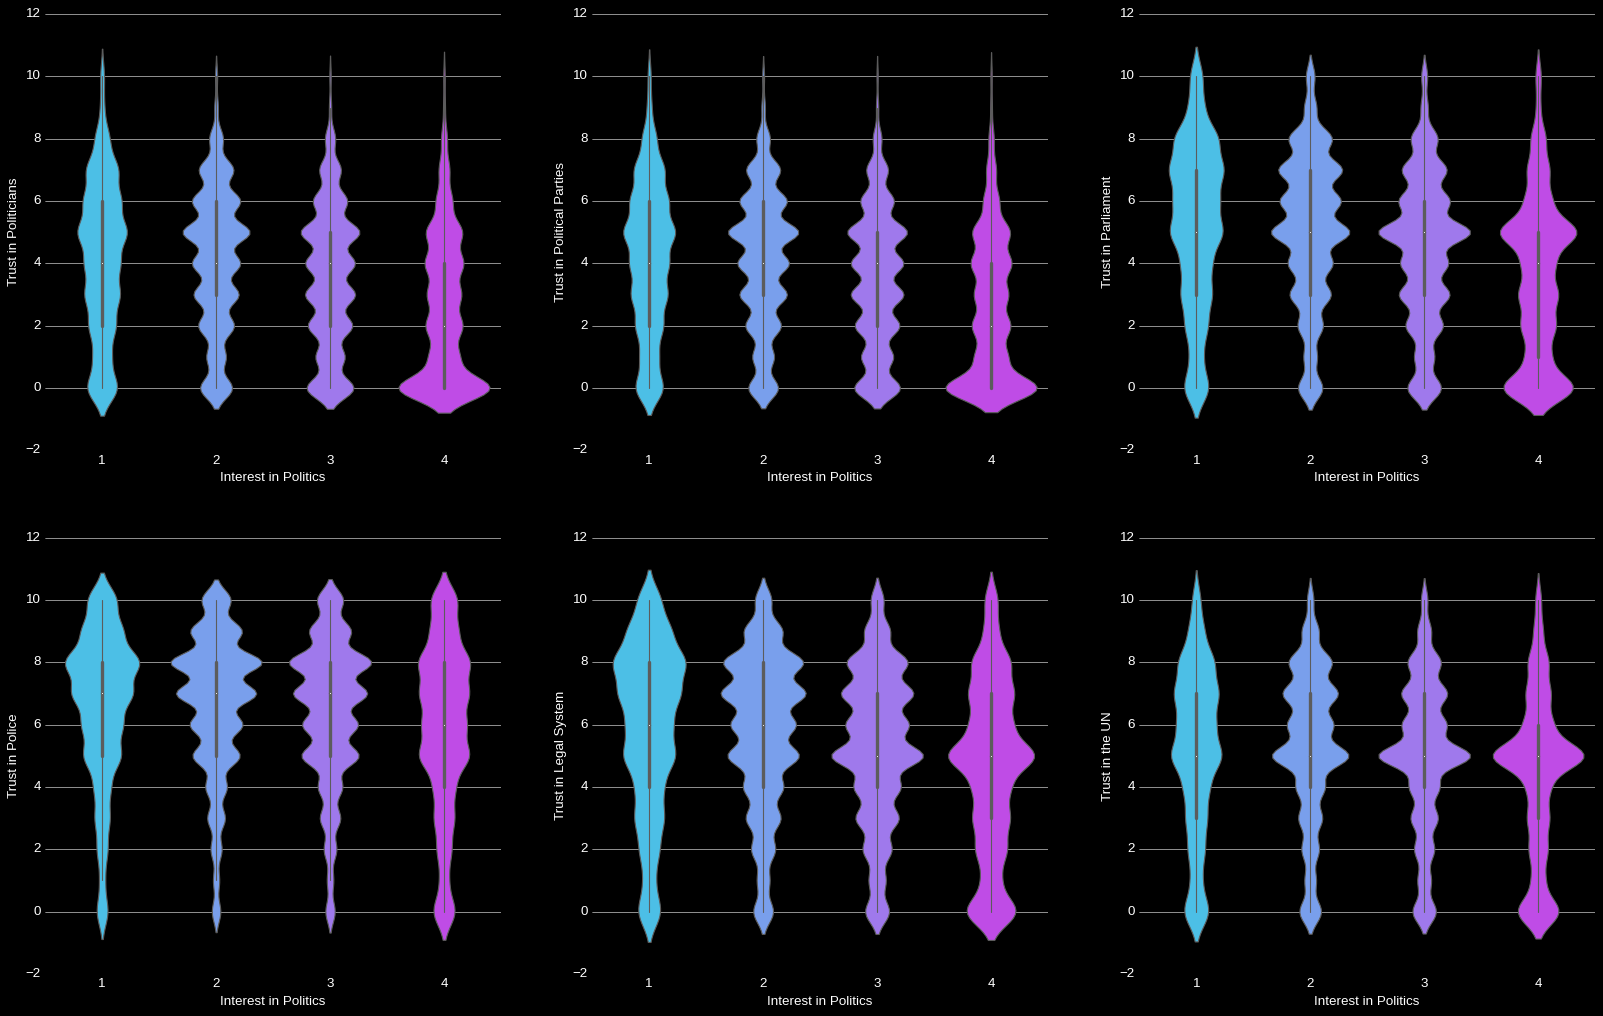

In [187]:
fig, axs = plt.subplots(2, 3, figsize=(25,15))
ax1 = sns.violinplot(data['polintr'],data['trstplt'], palette='cool',ax=axs[0,0])
ax1.set_xlabel('Interest in Politics')
ax1.set_ylabel('Trust in Politicians')

ax2 = sns.violinplot(data['polintr'],data['trstprt'], palette='cool',ax=axs[0,1])
ax2.set_xlabel('Interest in Politics')
ax2.set_ylabel('Trust in Political Parties')

ax3 = sns.violinplot(data['polintr'],data['trstprl'], palette='cool',ax=axs[0,2])
ax3.set_xlabel('Interest in Politics')
ax3.set_ylabel('Trust in Parliament')

ax4 = sns.violinplot(data['polintr'],data['trstplc'], palette='cool',ax=axs[1,0])
ax4.set_xlabel('Interest in Politics')
ax4.set_ylabel('Trust in Police')

ax5 = sns.violinplot(data['polintr'],data['trstlgl'], palette='cool',ax=axs[1,1])
ax5.set_xlabel('Interest in Politics')
ax5.set_ylabel('Trust in Legal System')

ax6 = sns.violinplot(data['polintr'],data['trstun'], palette='cool',ax=axs[1,2])
ax6.set_xlabel('Interest in Politics')
ax6.set_ylabel('Trust in the UN')



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Life Satisfaction')

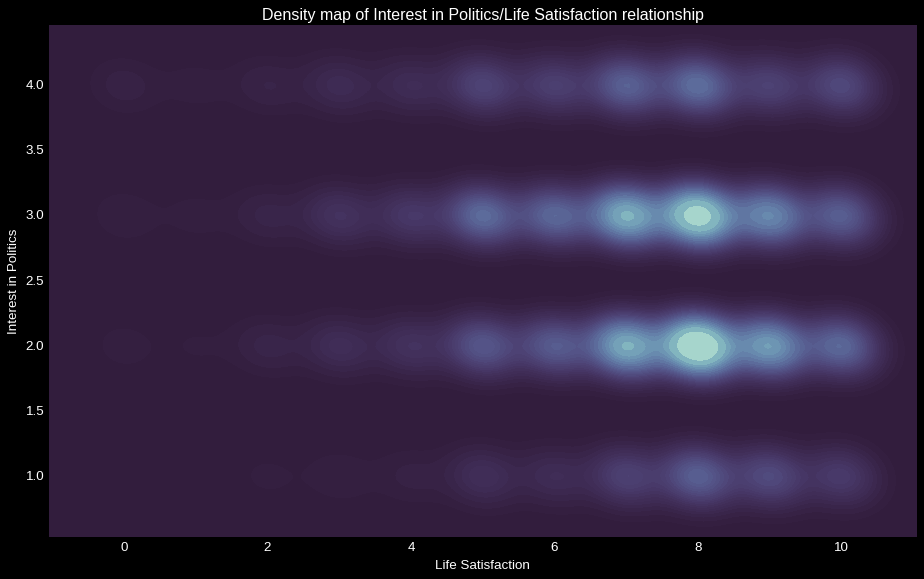

In [188]:
plt.figure(figsize=(14,8))
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, reverse=True)
ax = sns.kdeplot(data['stflife'],data['polintr'], cmap=cmap, fill=True,
        thresh=0, levels=30)
plt.title('Density map of Interest in Politics/Life Satisfaction relationship')
ax.set_ylabel('Interest in Politics')
ax.set_xlabel('Life Satisfaction')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


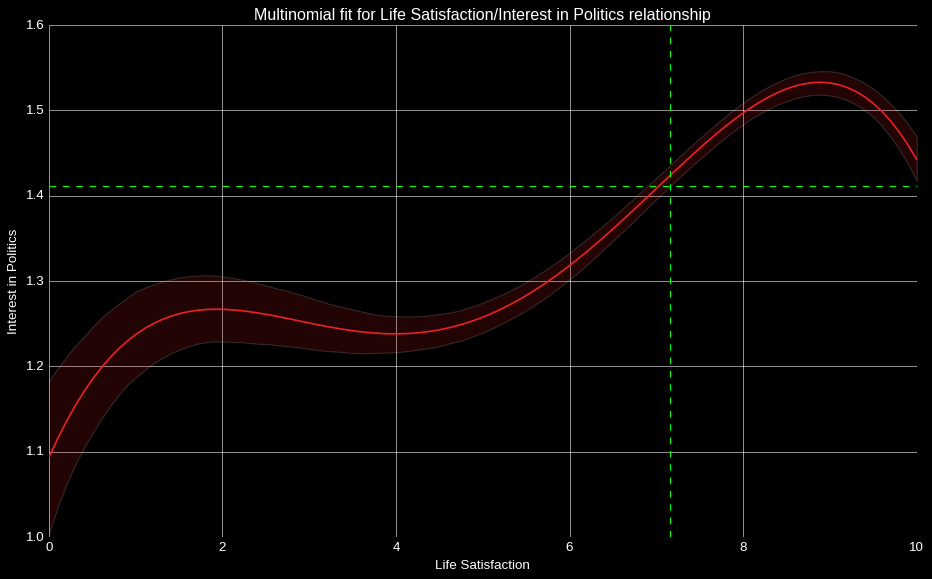

In [240]:
plot_init()
pl = sns.regplot(data['stflife'], rev(data['polintr'],4), color='#EA2027', scatter=False, order=4)
plt.xlabel('Life Satisfaction')
plt.ylabel('Interest in Politics')
plt.title('Multinomial fit for Life Satisfaction/Interest in Politics relationship')
plt.axvline(np.mean(data['stflife']), linestyle='--', color='lime')
plt.axhline(np.mean(rev(data['polintr'],4)), linestyle='--', color='lime')



Most people would report that their life satisfaction in a 1-10 scale is 8 and this people would also be in the middle of the political interest spectrum.

In [190]:
pltcrvcorr = data[['stflife','stfeco','stfgov','stfdem','stfedu','trstprl','trstlgl','trstplc','trstplt','trstprt','trstun']].corr()

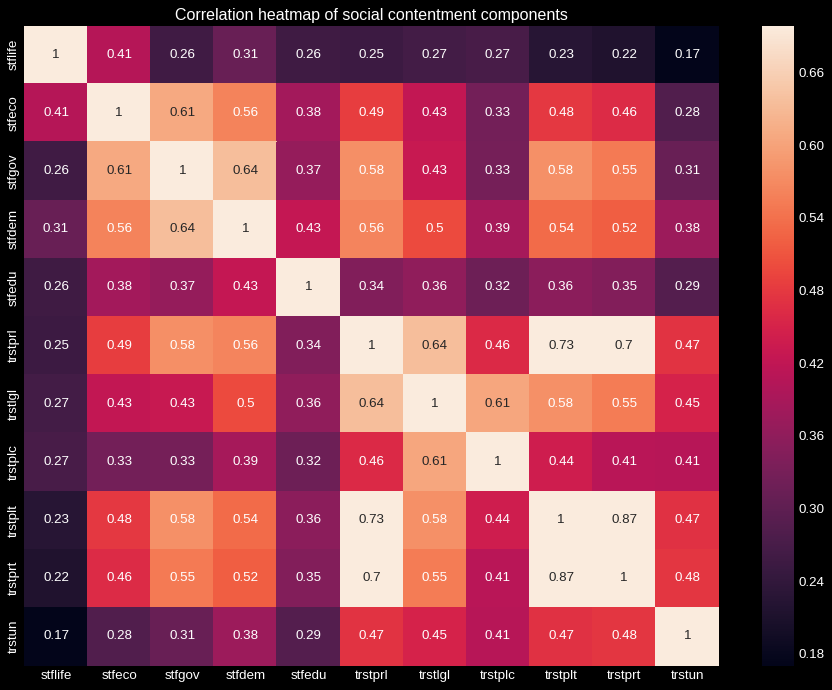

In [191]:
plt.figure(figsize=(14,10))
plt.title('Correlation heatmap of social contentment components')
sns.heatmap(pltcrvcorr, annot=True, vmax=.7)

Expected and obvious correlations are hereby demonstrated, for example, trust in political parties and in parliament is highly correlated with trust in politicians alone. The highest correlation that we get for satisfaction of life is with satisfaction of economy, but it's not that significant. A surprising one is that satisfaction with education does not seem to have a high level of importance as government, democracy, or economy do.

In [192]:
additional_bivar = ['eduyrs','netusoft','nwspol','netustm']

In [193]:
cag = data.columns.get_loc("agea")

In [194]:
ix = data['agea'].loc[data['agea']>110].index

In [195]:
age_tmp = data['agea'].drop(ix)

In [196]:
#setting mean value for invalid age entries
data.iloc[ix,cag] = np.mean(age_tmp)

In [197]:
inv_netustm_index = data['netustm'].loc[(data['netustm']==7777) | (data['netustm']==8888) | (data['netustm']==6666) | (data['netustm']==9999)].index

In [198]:
cag2 = data.columns.get_loc("netustm")

In [199]:
tmp_calc = data['netustm'].drop(inv_netustm_index)

In [200]:
#setting mean value for invalid netustm entries
data.iloc[inv_netustm_index,cag2] = np.mean(tmp_calc)

In [201]:
data['netustm'].loc[(data['netustm']==7777) | (data['netustm']==8888) | (data['netustm']==6666) | (data['netustm']==9999)]

Series([], Name: netustm, dtype: float64)

In [202]:
nwspol_invalid_index = data['nwspol'].loc[(data['nwspol']==7777) | (data['nwspol']==8888) | (data['nwspol']==6666) | (data['nwspol']==9999)].index

In [203]:
cag3 = data.columns.get_loc("nwspol")

In [204]:
tmp_calc_nwspol = data['nwspol'].drop(nwspol_invalid_index)

In [205]:
data.iloc[nwspol_invalid_index,cag3] = np.mean(tmp_calc_nwspol)

In [206]:
gabcorr = data[np.concatenate((['stflife','stfeco','stfgov','stfdem','stfedu','trstprl','trstlgl','trstplc','trstplt','trstprt','trstun'],additional_bivar))].corr()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'News Consumption')

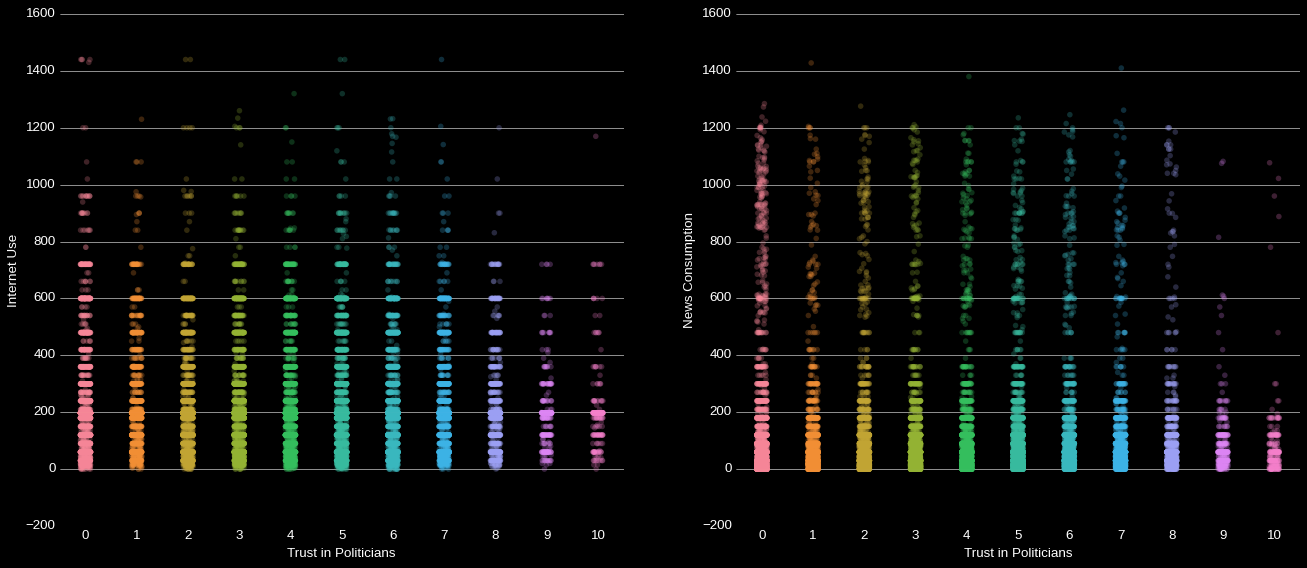

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
ax1 = sns.stripplot(data['trstplt'],data['netustm'], alpha=.25,ax=axs[0])
ax1.set_xlabel('Trust in Politicians')
ax1.set_ylabel('Internet Use')

ax2 = sns.stripplot(data['trstplt'],data['nwspol'], alpha=.25,ax=axs[1])
ax2.set_xlabel('Trust in Politicians')
ax2.set_ylabel('News Consumption')


Text(0.5, 8.844444444444436, 'Time Consuming News (Mins)')

<Figure size 1440x640 with 0 Axes>

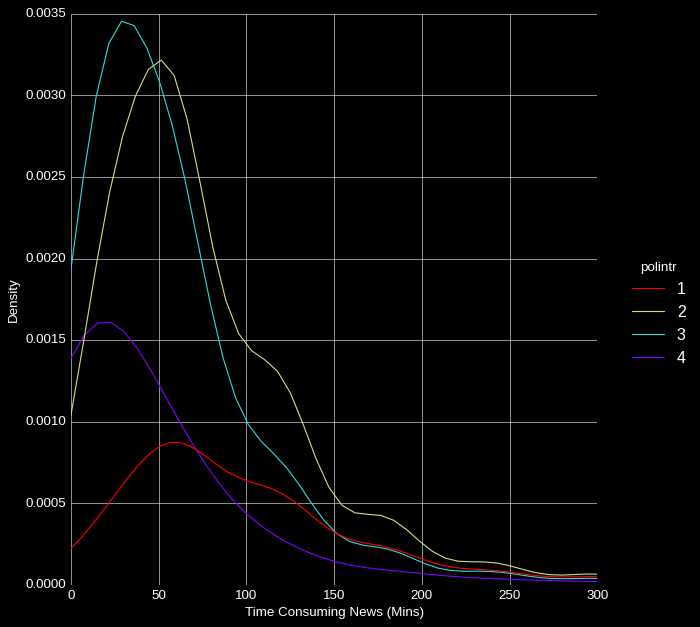

In [208]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="nwspol", hue="polintr", 
    kind="kde", height=8,
    multiple="layer", clip=(0, None),
    palette="rainbow_r", alpha=.50
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 300))
axes[0].set_xlabel('Time Consuming News (Mins)')

Text(0.5, 8.844444444444436, 'Time Consuming News (Mins)')

<Figure size 1440x640 with 0 Axes>

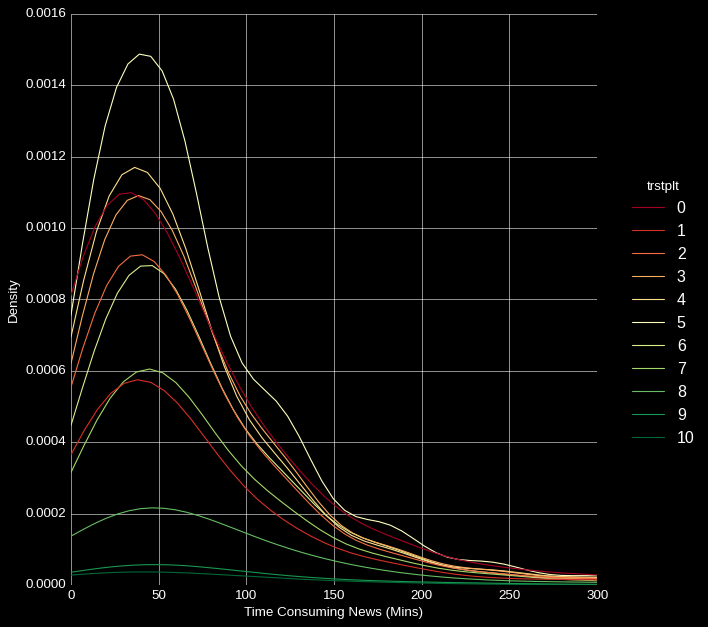

In [209]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="nwspol", hue="trstplt", 
    kind="kde", height=8,
    multiple="layer", clip=(0, None),
    palette="RdYlGn", alpha=.25
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 300))
axes[0].set_xlabel('Time Consuming News (Mins)')

Text(0.5, 8.844444444444436, 'Internet Usage')

<Figure size 1440x640 with 0 Axes>

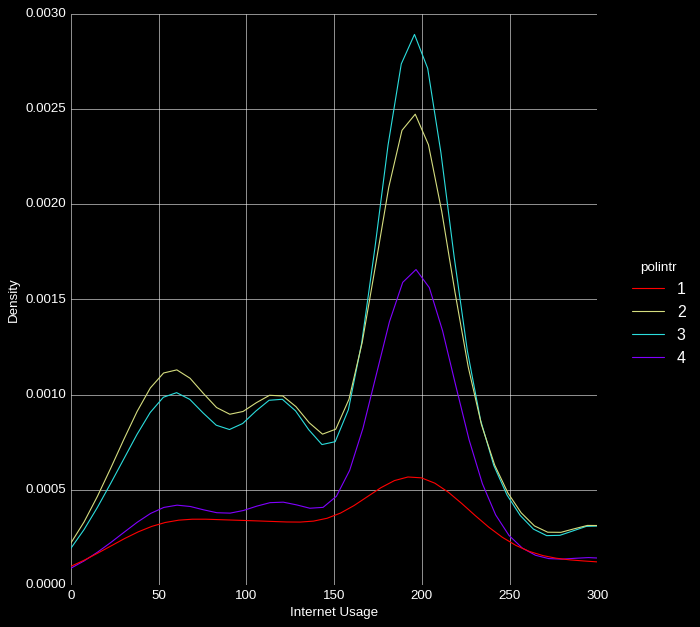

In [210]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="netustm", hue="polintr", 
    kind="kde", height=8,
    multiple="layer", clip=(0, None),
    palette="rainbow_r", alpha=.50
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 300))
axes[0].set_xlabel('Internet Usage')

Text(0.5, 8.844444444444436, 'Internet Usage')

<Figure size 1440x640 with 0 Axes>

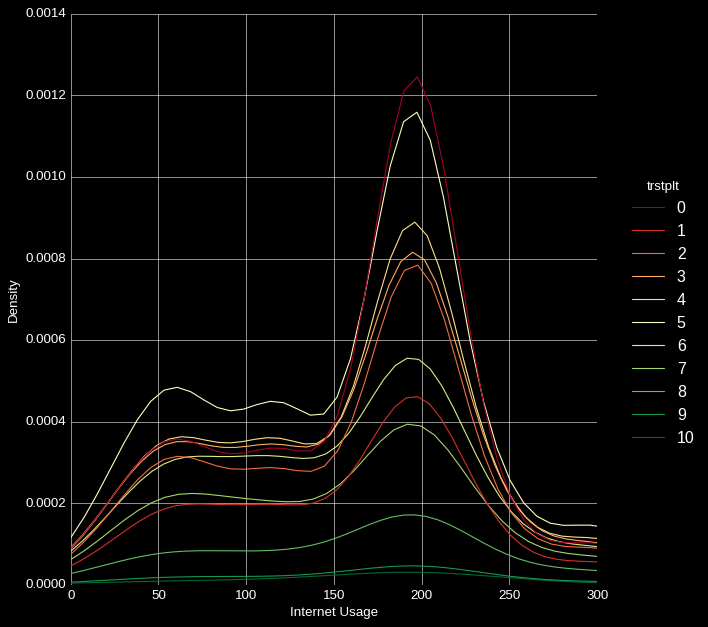

In [211]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="netustm", hue="trstplt", 
    kind="kde", height=8,
    multiple="layer", clip=(0, None),
    palette="RdYlGn", alpha=.25
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 300))
axes[0].set_xlabel('Internet Usage')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot - Age of Respondants')

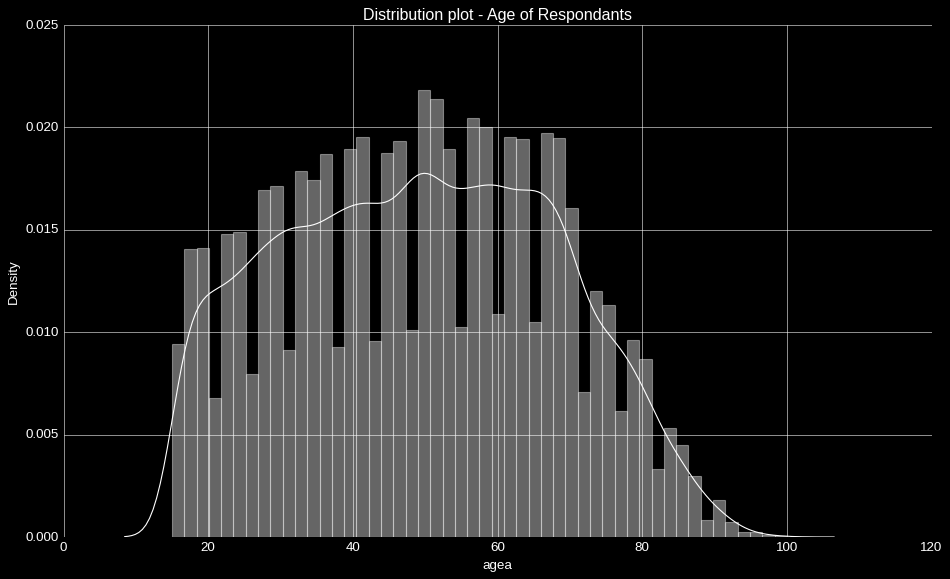

In [212]:
plot_init()
sns.distplot(data['agea'], color='white')
plt.title('Distribution plot - Age of Respondants')

Text(0.5, 8.844444444444436, 'Age')

<Figure size 1440x640 with 0 Axes>

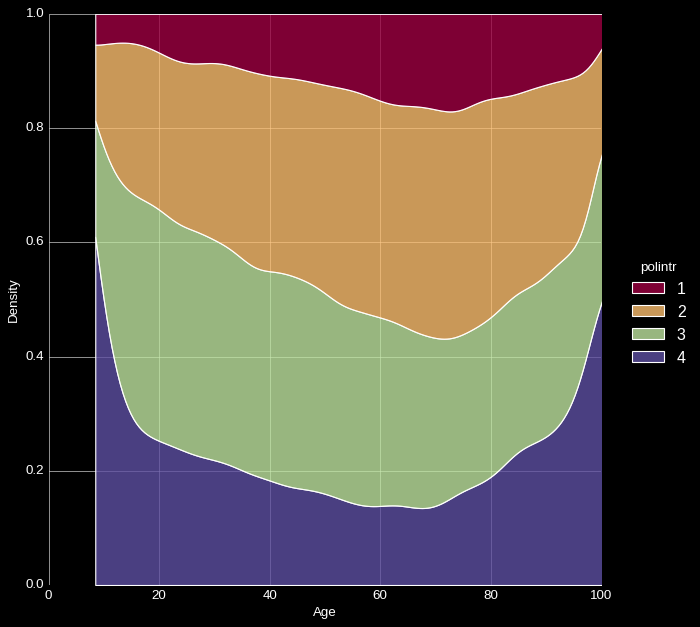

In [213]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="agea", hue="polintr", 
    kind="kde", height=8,
    multiple="fill", clip=(0, None),
    palette="Spectral", alpha=.80
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 100))
axes[0].set_xlabel('Age')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tendency curve -  Evolution of political interest throughout age (Reversed Scale)')

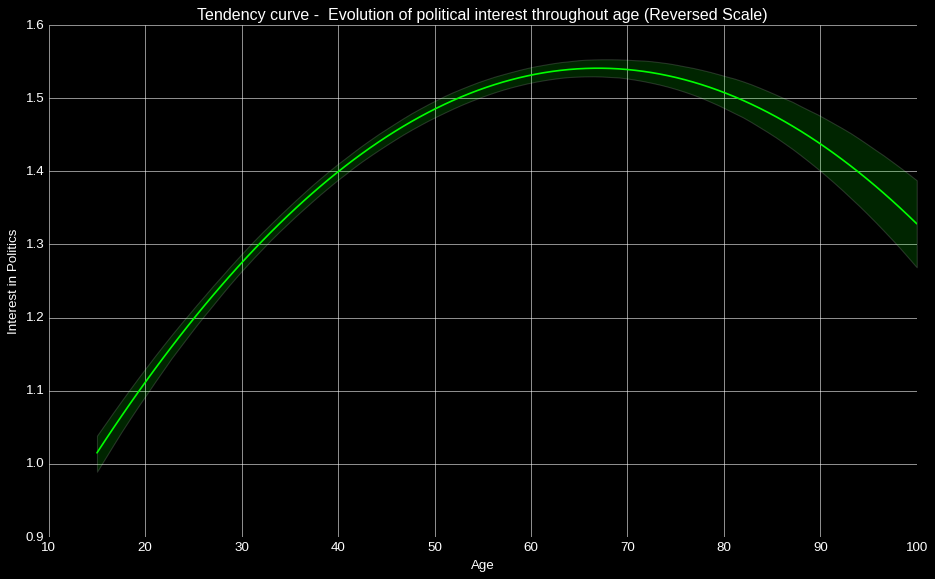

In [214]:
plot_init()
pl = sns.regplot(data['agea'], rev(data['polintr'],4), color='lime', scatter=False, order=2)

plt.xlabel('Age')
plt.ylabel('Interest in Politics')
plt.title('Tendency curve -  Evolution of political interest throughout age (Reversed Scale)')

Text(0.5, 8.844444444444436, 'Age')

<Figure size 1440x640 with 0 Axes>

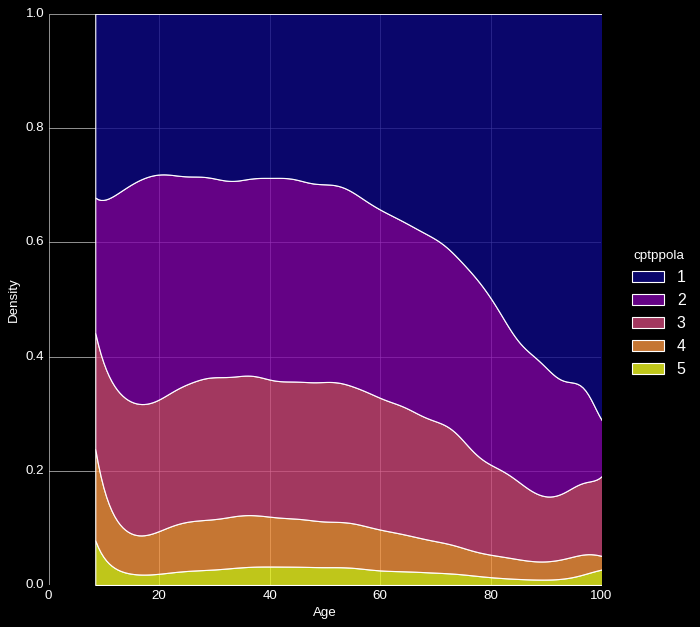

In [215]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="agea", hue="cptppola", 
    kind="kde", height=8,
    multiple="fill", clip=(0, None),
    palette="plasma", alpha=.80
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 100))
axes[0].set_xlabel('Age')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tendency curve -  Evolution of political ability perception throughout age')

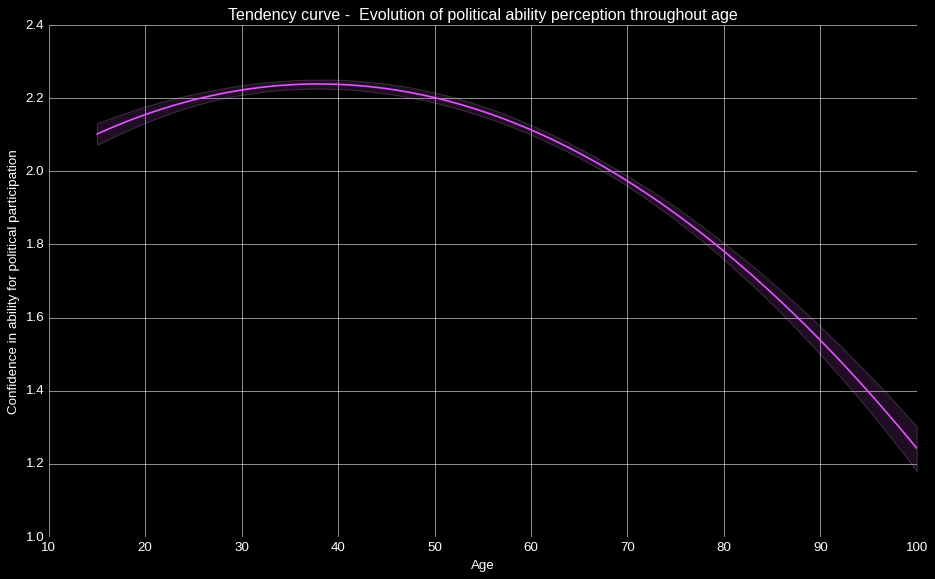

In [216]:
plot_init()
pl = sns.regplot(data['agea'], data['cptppola'], color='#e056fd', scatter=False, order=2)

plt.xlabel('Age')
plt.ylabel('Confidence in ability for political participation')
plt.title('Tendency curve -  Evolution of political ability perception throughout age')

Text(0.5, 8.844444444444436, 'Age')

<Figure size 1440x640 with 0 Axes>

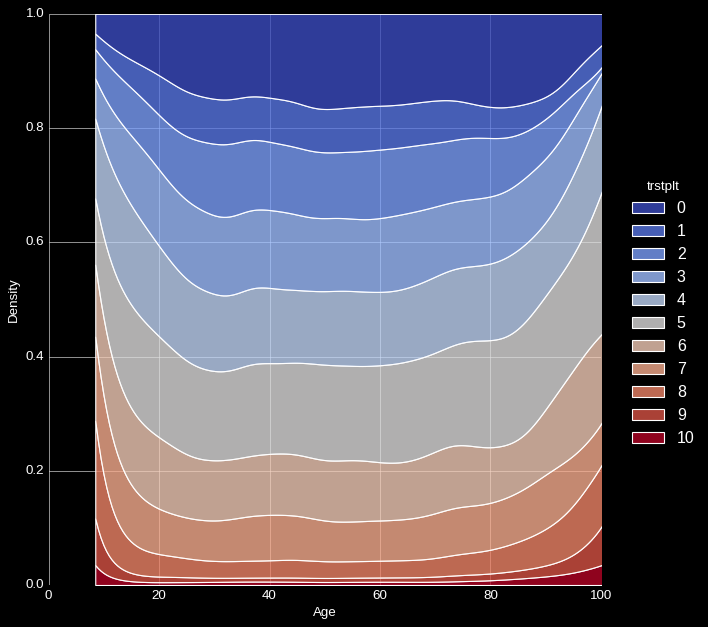

In [217]:
plt.figure(figsize=(18,8))
pl = sns.displot(
    data=data,
    x="agea", hue="trstplt", 
    kind="kde", height=8,
    multiple="fill", clip=(0, None),
    palette="coolwarm", alpha=.80
)
axes = pl.axes.flatten()
pl.set(xlim=(0, 100))
axes[0].set_xlabel('Age')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tendency curve -  Evolution of trust in politicians throughout age')

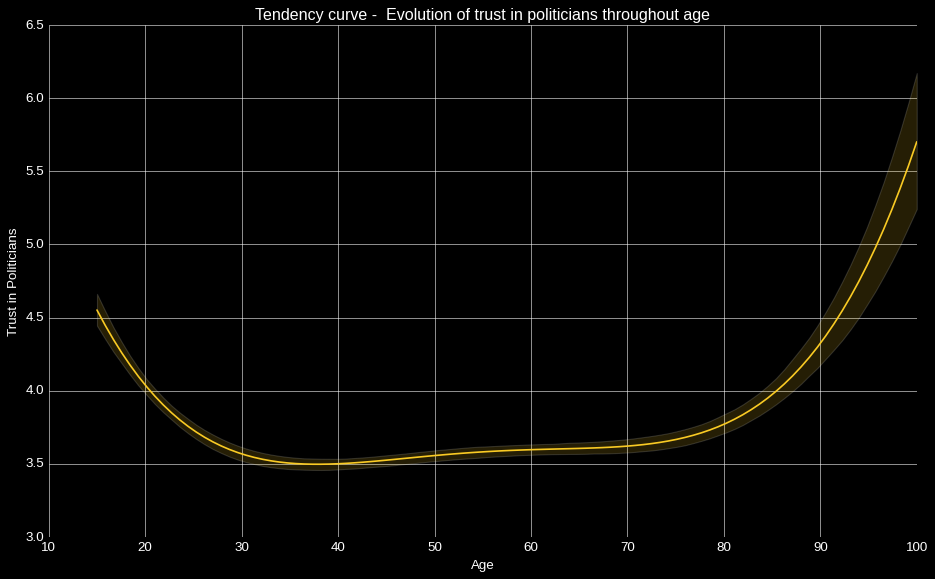

In [234]:
plot_init()
pl = sns.regplot(data['agea'], data['trstplt'], color='#f9ca24', scatter=False, order=4)

plt.xlabel('Age')
plt.ylabel('Trust in Politicians')
plt.title('Tendency curve -  Evolution of trust in politicians throughout age')

###<u>Psychological Viewpoints Augmentment</u>

I will be focusing on using the psychological viewpoints of the subjects in order to augment the perspective on political activity and opinion volatility.

In [219]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [220]:
psvp = ['ppltrst','pplfair','pplhlp','ipcrtiv','imprich','ipeqopt','ipshabt','impsafe','impdiff','ipfrule','ipudrst','ipmodst','ipgdtim','impfree','iphlppl','ipsuces','ipadvnt','ipbhprp','iprspot',
        'iplylfr','imptrad','impfun','happy','sclmeet','inprdsc','rlgdgr','pray','gndr']

In [221]:
psvp_labels = [SearchVar(psvp[i])['Label'].any() for i in range(len(psvp))]

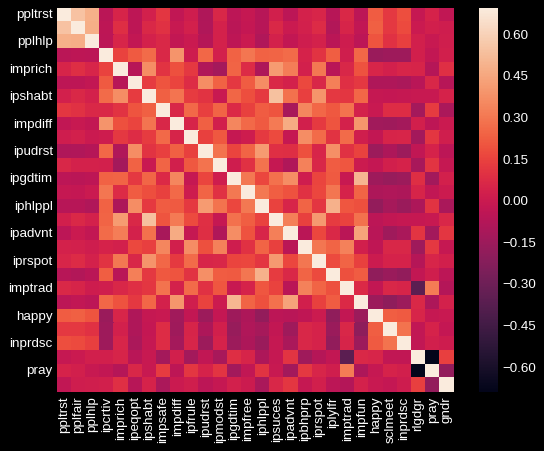

In [222]:
sns.heatmap(data[psvp].corr(), vmax=.7)

####Which features adecuate the most to the political actionable spectrum?

In [223]:
psvp_labels

["Most people can be trusted or you can't be too careful",
 'Most people try to take advantage of you, or try to be fair',
 'Most of the time people helpful or mostly looking out for themselves',
 'Important to think new ideas and being creative',
 'Important to be rich, have money and expensive things',
 'Important that people are treated equally and have equal opportunities',
 'Important to show abilities and be admired',
 'Important to live in secure and safe surroundings',
 'Important to try new and different things in life',
 'Important to do what is told and follow rules',
 'Important to understand different people',
 'Important to be humble and modest, not draw attention',
 'Important to have a good time',
 'Important to make own decisions and be free',
 'Important to help people and care for others well-being',
 'Important to be successful and that people recognize achievements',
 'Important to seek adventures and have an exciting life',
 'Important to behave properly',
 'Impor

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


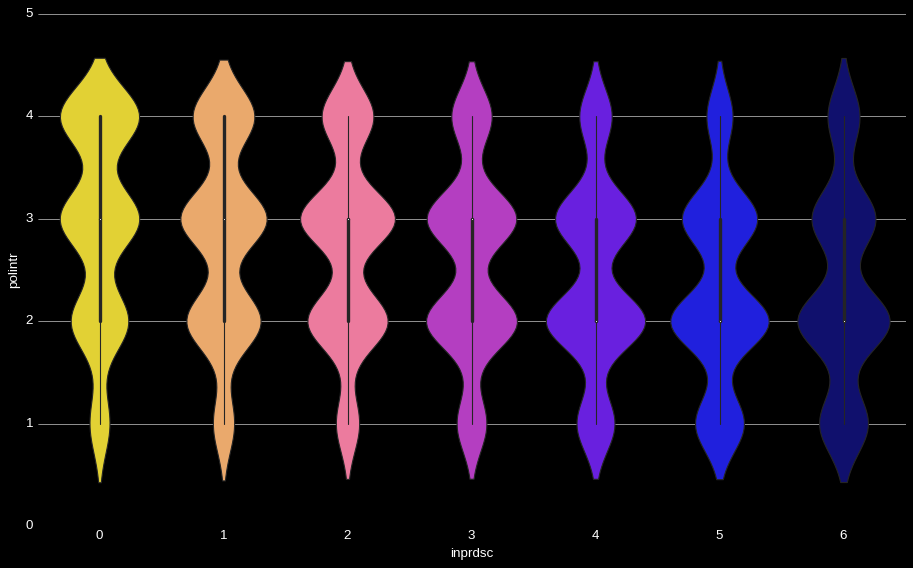

In [224]:
plot_init()
sns.violinplot(data['inprdsc'],data['polintr'], palette='gnuplot2_r', bw=0.3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Amount people you can discuss intimate and personal matters (REP. LVLS.)')

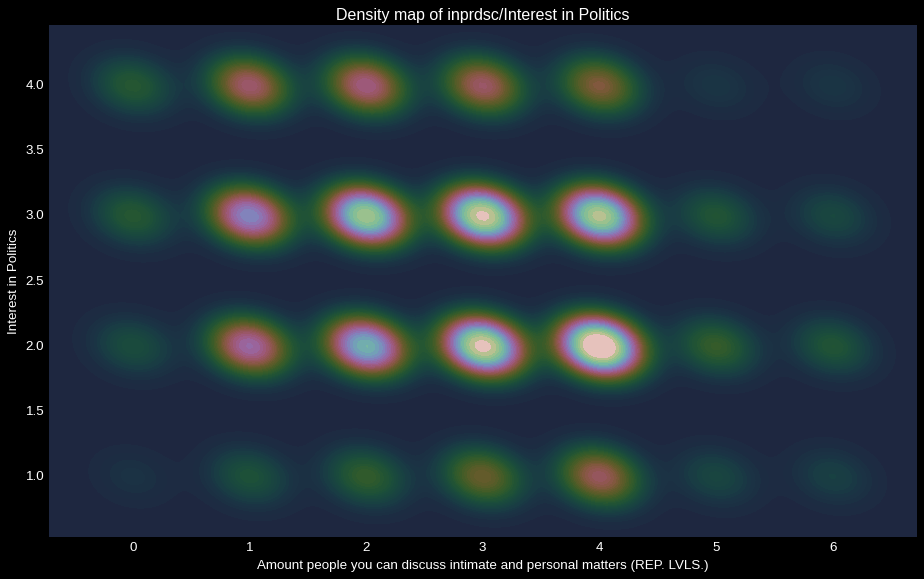

In [225]:
plt.figure(figsize=(14,8))
cmap = sns.cubehelix_palette(start=1,rot=-2.5, as_cmap=True, reverse=True)
ax = sns.kdeplot(data['inprdsc'],data['polintr'], cmap=cmap, fill=True,
        thresh=0, levels=50)
plt.title('Density map of inprdsc/Interest in Politics')
ax.set_ylabel('Interest in Politics')
ax.set_xlabel('Amount people you can discuss intimate and personal matters (REP. LVLS.)')

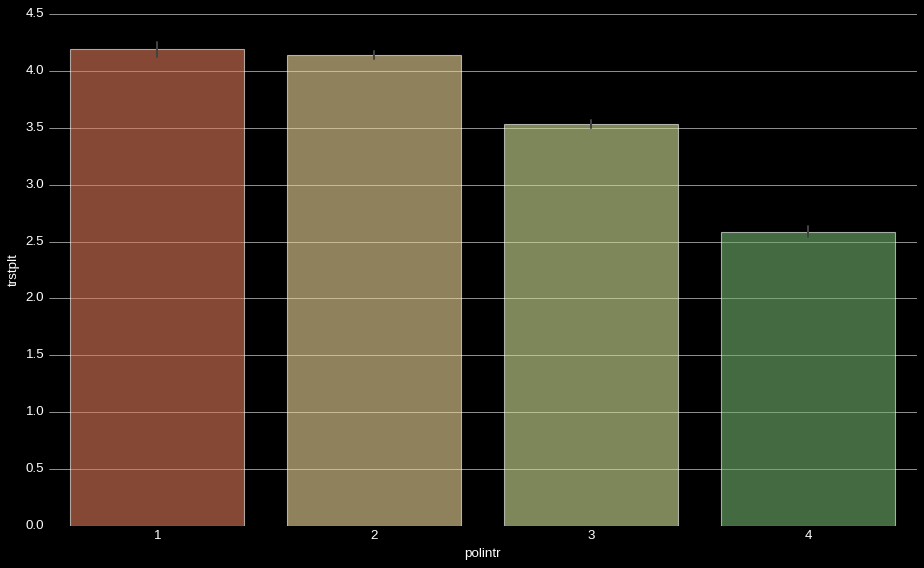

In [226]:
plot_init()
sns.barplot(data=data,x='polintr',y='trstplt', palette='RdYlGn', alpha=.60)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Tendency curve -  Trust in Politicians/Interest in Politics relationship')

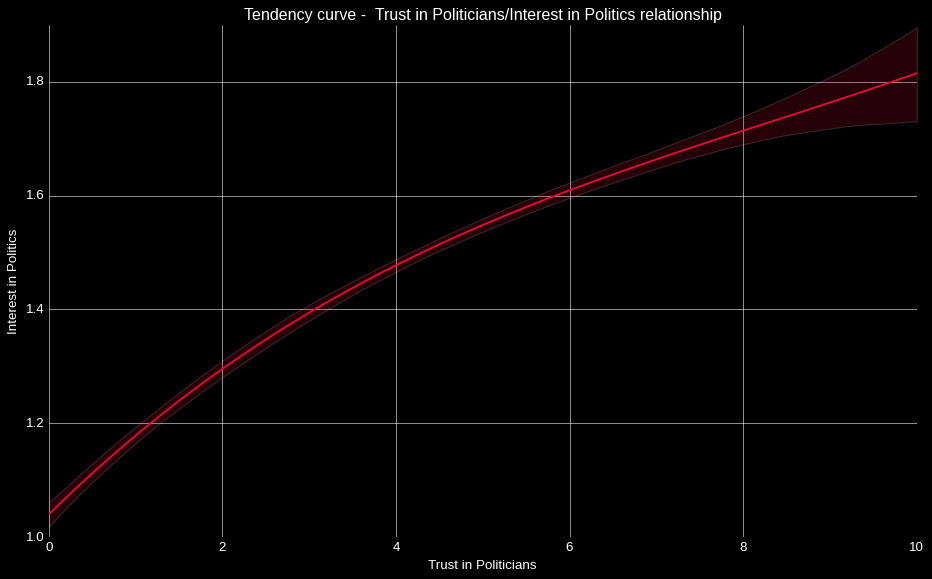

In [236]:
plot_init()
pl = sns.regplot(data['trstplt'], rev(data['polintr'],4), color='#fc033d', scatter=False, order=3)
plt.xlabel('Trust in Politicians')
plt.ylabel('Interest in Politics')
plt.title('Tendency curve -  Trust in Politicians/Interest in Politics relationship')

Text(0.5, 1.0, 'Tendency curves for personal feelings variables against trust in politicians/politics')

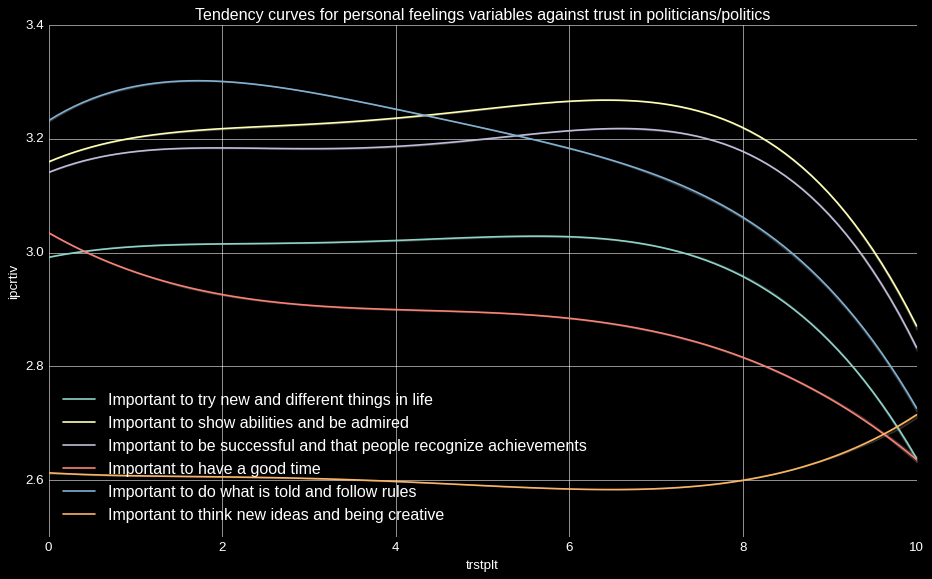

In [231]:
plot_init()
sns.regplot(data=data, x='trstplt',y='impdiff', order=4, scatter=False, ci=4, label='Important to try new and different things in life')
sns.regplot(data=data, x='trstplt',y='ipshabt', order=4, scatter=False, ci=4, label='Important to show abilities and be admired')
sns.regplot(data=data, x='trstplt',y='ipsuces', order=4, scatter=False, ci=4, label='Important to be successful and that people recognize achievements')
sns.regplot(data=data, x='trstplt',y='ipgdtim', order=4, scatter=False, ci=4, label='Important to have a good time')
sns.regplot(data=data, x='trstplt',y='ipfrule', order=4, scatter=False, ci=4, label='Important to do what is told and follow rules')
sns.regplot(data=data, x='trstplt',y='ipcrtiv', order=4, scatter=False, ci=4, label='Important to think new ideas and being creative')


plt.legend(loc='lower left')
plt.title('Tendency curves for personal feelings variables against trust in politicians/politics')